# Matrix Algebra

Statisticians and data scientists use the language of vectors and matrices to organize data and work with models.
We will take a close look at matrix algebra, taking time to relate matrix algebra to algebra that you have worked with in the past, and show how to apply the tools in matrix algera to statistics you learned in Population Health Data Science I. 

## Vectors and operations with them

### Definition of a vector
For this class we will consider a **vector** an ordered list of real numbers.
To define a vector with the values 1,2,3,4,5, in that order, we can write
\begin{align}
    v = [1,2,3,4,5]
\end{align}

or 

\begin{align}
    v = \left [
        \begin{matrix}
            1 \\ 
            2 \\
            3 \\
            4 \\
            5 \\
        \end{matrix} \right ]
\end{align}

A vector has a **length**, defined as the number of values included in that vector. 
For example, the above vector is length 5.

Vectors of length 2 and 3 can be visualized as directed line segments.
To visualize a vector $v=[x,y]$ of length 2, place your pencil at the origin [0,0] and draw a line to the point $[x,y]$. 

### Vector times a scalar

A vector of length one is called a **scalar**.
We can define the results of multiplying a vector $v=[a,b,c,d]$ by a scalar $\alpha$ as each entry of the vector times the scalar $\alpha$. 

\begin{align}
    \alpha v = \left [
                    \begin{matrix}
                    \alpha \times a \\ 
                    \alpha \times b \\
                    \alpha \times c \\
                    \alpha \times d \\
                \end{matrix} \right ]
\end{align}

When a vector is multiplied by a scalar, that vector is "stretched" if the scalar is greater than one, "shrunk" if the scalar is less than one, and not changed if the scalar is equal to one.  


### Vector plus/minus a vector

A vector $v$ plus a vector $q$ creates a new vector that adds the individual entries of $v$ and $q$

\begin{align}
    v &= [4,-1,7] \\ 
    q &= [0,32,9] \\ 
    v + q &= [ 4+0, -1+32, 7+9] = [4,31,16]
\end{align}

A vector  $v$ minus a vector $q$ creates a new vector that subtracts the individual entries of $q$ from $v$
 

\begin{align}
    v &= [4,-1,7] \\ 
    q &= [0,32,9] \\ 
    v - q &= [ 4-0, -1-32, 7-9] = [4,-33,-2]\\
    q - v &= [ 0-4, 32-(-1), 9-7] = [-4,33,2]
\end{align}

### Visualizing  vector addition and subtraction

To visualize the result of adding and subtarcting two vectors, we can draw a parallellogram with the lengths of the sides of the parallellogram correspond to the legnths of the two vevtors we wish to add or subtract. 

Suppose we want to add and subtract the vectors $a$ and $b$
\begin{align}
    a =  \left [\begin{matrix}
                    1 \\ 
                    2 \\
                \end{matrix} \right ]
\end{align}


\begin{align}
    b =  \left [\begin{matrix}
                    2 \\ 
                    5 \\
                \end{matrix} \right ]
\end{align}





## The Matrix

A **matrix** is a ordered list of vectors.

\begin{align}
    M = \left [ \begin{matrix}
            1 & 2 & 3 \\
            4 & 5 & 6 \\
            3 & 2 & 13 \\
            90 & 23 & 0 \\
         \end{matrix} \right ]   
\end{align}

The **dimension** of a matrix is a an ordered pair of numbers: the first number indicates the number of rows of the matrix and the second number indicates the number of columns. 
For example, $M$ has dimension $$(4,3)$$.

### Matrix Transpose
Given a matrix $M$, the **tranpose** of $M$, $M^{'}$ or $M^{\text{T}}$, is a matrix where the first row of $M^{'}$ corresponds to the first column of $M$, the second row of $M^{'}$ corresponds to the second columns of $M$ and so on. 
If $M$ has dimension $(r,c)$ than $M^{'}$ has dimensions $(c,r)$. 

For example, if 
\begin{align}
    M = \left [ \begin{matrix}
            1 & 2 & 3 \\
            4 & 5 & 6 \\
            3 & 2 & 13 \\
            90 & 23 & 0 \\
         \end{matrix} \right ]
\end{align}
then the tranpose of $M$, 
\begin{align}
    M^{'} = \left [ \begin{matrix}
            1 & 4 & 3 & 90 \\
            2 & 5 & 2 & 23 \\ 
            3 &  6 &  13 & 0 \\
         \end{matrix} \right ]   
\end{align}

### Matrix plus/minus a matrix

Given a matrix $A$ and matrix $B$, the sum of $A$ and $B$ is a new matrix $C$ where the i,j entry of C ($C_{ij}$) is the sum of the corresponding entries from $A$ and $B$ ($C_{ij} = A_{ij} + B_{ij}$). To add two matrices they must have the same dimension.  

\begin{align}
    A &= \left [ \begin{matrix}
                    1 & 2 & 3 \\ 
                    4 & 5 & 6 \\
                \end{matrix}
        \right ] \\ 
    B &=  \left [ \begin{matrix}
                    6 & 5 & 4 \\ 
                    3 & 2 & 1 \\
                \end{matrix}
        \right ] \\
    %
    C &= A + B = \left [ \begin{matrix}
                    1+6 & 2+5 & 3+4 \\ 
                    4+3 & 5+2 & 6+1 \\
                \end{matrix}
        \right ]  = \left [ \begin{matrix}
                    7 & 7 & 7 \\ 
                    7 & 7 & 7 \\
                \end{matrix}
        \right ] \\ 
    D &= A - B = \left [ \begin{matrix}
                    1-6 & 2-5 & 3-4 \\ 
                    4-3 & 5-2 & 6-1 \\
                \end{matrix}
        \right ]  = \left [ \begin{matrix}
                    -5 & -3 & -1 \\ 
                    1 & 3 & 5 \\
                \end{matrix}
        \right ] \\     
\end{align}


### Matrix times a Matrix 
Two matrices $A$ and $B$ can be multiplied together $C = AB$ if the number of columns of $A$ is equal to the number of rows of $B$.
The i,j entry of this product, $C_{ij}$, assuming th number of columns of $A$ and number of rows of $B$ equals $N$, is the following sum of products:

\begin{align}
    C_{i,j} &= a_{i,1}b_{1,j} + a_{i,2}b_{2,j} + a_{i,3}b_{3,j} + \cdots + a_{i,N}b_{N,j}\\
            &= \sum_{e=1}^{N} a_{i,e}b_{e,j}
\end{align}

For example, suppose that
\begin{align}
    A = \left [ \begin{matrix}
                     1 & 2\\
                     3 & 4 \\
                 \end{matrix} \right] 
\end{align}
and that 
\begin{align}
    B = \left [ \begin{matrix}
                     1 & 2 & -1\\
                     3 & 4 & -2 \\
                 \end{matrix} \right] . 
\end{align}
Then the product $C = AB$ equals 

\begin{align}
    C = AB = \left [ \begin{matrix}
                            1*1 + 2*3 & 1*2 + 2*4 & 1*-1 + 2*-2 \\
                            3*1 + 4*3 & 3*2 + 4*4 & 3*-1 + 4*-2 \\
                      \end{matrix} \right] = 
                    \left [ \begin{matrix}
                            7 & 10 & -5 \\
                            15 & 22 & -11 \\
                      \end{matrix} \right] 
\end{align}                      
                            
it is important to note that $AB$ is not necessarily equal to $BA$.         

### Matrix times a vector

A matrix $A$ with dimension $(r,c)$ can be multiplied by a vector $v$ if the length of $v$ is $c$. 
Then the product $Av$ is a vector with the the i$^{\text{th}}$ entry of $Av$ defined as 
\begin{align}
    (Av)_{i} = \sum_{k=1}^{c} A_{i,k} v_{k}
\end{align}

For example, 
Let the matrix
\begin{align}
    A = \left [ \begin{matrix}
                   1 & 2 \\ 
                   3 & 4 \\
                   5 & 6 \\
         \end{matrix} \right ]
\end{align}
and the vector 
\begin{align}
    v = \left [ \begin{matrix}
                   4  \\ 
                   -3  \\
         \end{matrix} \right ]
\end{align}
then 

\begin{align}
    Av = \left [ \begin{matrix}
                   1*4+2*-3 \\ 
                   3*4+4*-3 \\
                   5*4+6*-3 \\
         \end{matrix} \right ] = 
         \left [ \begin{matrix}
                   -2  \\ 
                   0  \\
                   2 \\
         \end{matrix} \right ]
\end{align}

### Matrix inverse

#### The identity matrix
The **identity matrix** of dimension $r$, usually labled $I_{r}$, is a matrix with $r$ rows and $r$ columns such that the diagonal elements of the matrix, the (1,1) entry, (2,2) entry, up to (r,r) entry are the number 1 and all other entries are 0.
For example,

\begin{align}
    I_{2} = \left [ \begin{matrix}
                        1 & 0 \\ 
                        0 & 1 \\
                     \end{matrix}
             \right ] 
\end{align}
This matrix is called the identity matrix because any matrix $A$ times $I$ returns $A$ (try it!). 
To be more precise, this matrix is the *multiplicative* identity matrix. But the adjective *multiplicative* is usually dropped. 

#### The inverse matrix
The **inverse** of a matrix $A$---$A^{-1}$---is a matrix such that, if $A$ has the same number of rows and columns (called square) then
\begin{align}
    A A^{'} = A^{'}A = I
\end{align}

### The matrix as a function

A function, by definition, is a mathematical object that takes an input and returns a unique output. 
For example the function $f(x) = x^{2}$ defined on the real numbers takes as input any real number and returns one, unique real number.
The function $f(x,y) = xy$ takes as input a pair $(x,y)$ and returns the product of $x$ and $y$. One input corresponds to one output. 

From above, when we multiply a matrix by a vector the result is a single vector. 
For every vector $v$, $Av$ returns a vector.
We can think of $A$ as a function. 
We input the vector $v$ to matrix $A$ and receive an output vector $(Av)$.




### The dot (inner) product and orthogonality
The **dot product** between vector $v$ with entries $[v_{1},v_{2},\cdots,v_{l}]$ and vector $q$ with entries $[q_{1},q_{2},\cdots,q_{l}]$ is defined as 

\begin{align}
    v \cdot q = v'q &= v_{1}q_{1} + v_{2}q_{2} + \cdots, v_{l}q_{l}\\
    &= \sum_{i=1}^{l} v_{i}q_{i}
\end{align}

We can use the dot product to help define matrix multiplication.
For a matrix A and B, the (i,j) entry of the product $C=AB$ is 
\begin{align}
    C_{i,j} &= \sum_{k=1}^{N} a_{i,k}b_{k,j} \\ 
            &= a_{i,}^{'}b_{,j}
\end{align}
where $a_{i,}$ denotes the $i^{\text{th}}$ row of the matrix $A$ and $b_{,j}$ denotes the $j^{\text{th}}$ column of the matrix $B$.

### The norm

For this class, every vector we encounter has a **norm**. 
The norm for a vector $v$ with entries $v_{1},v_{2},v_{3},\cdots,v_{N}$ will be defined in this class as 

\begin{align}
    || v || &= \left( v_{1}^{2} + v_{2}^{2} + v_{3}^{2} + \cdots + v_{N}^{2} \right )^{1/2} \\ 
            &= \left( \sum_{i=1}^{N} v_{i}^{2} \right) ^{1/2} \\ 
            &= v'v
\end{align}

In the case of vectors with length $2$ this norm should look familiar

\begin{align}
    v &= [a,b]\\
    ||v|| &= \sqrt{ a^{2} + b^{2}}
\end{align}


### Ways matrix algebra can help us think about staistics

Matrix algebra is frequently used in statistics because of how this algebra simplifies working with multiple data points. For example, assume we collected $N$ obervations and for each observation we collected $p+1$ pieces of information: the first $p$ pieces of information are meant to help us explain the $p+1$ piece of info that we will call $y$. 

Our data can be formatted into a matrix with rows corresponding to observations and $p$ columns, one column for each piece of information:
\begin{align}
    D = \left [ \begin{matrix}
                    d_{1,1} & d_{1,2} & \cdots & d_{1,p} \\
                    d_{2,1} & d_{2,2} & \cdots & d_{2,p} \\
                    \vdots  & \vdots  & \ddots & \vdots  \\
                    d_{N,1} & d_{N,2} & \cdots & d_{N,p} \\
                \end{matrix} \right ]
\end{align}

and $y$, our target or response variable we wish to explain with the above $p$ variables, can be formamted as a vector

\begin{align}
    y = \left [ \begin{matrix} 
                    y_{1}\\
                    y_{2}\\
                    y_{3}\\
                    \vdots\\
                    y_{N}
                \end{matrix}
    \right ]
\end{align}


With our data and target defined as above, we can use vectors to create famailar statistics. 
The mean of the $p$ pieces of information we collected on $N$ observations---often called $p$ covariates---can be computed using a vectors of 1s

Define a ones vector of length $N$ as 
\begin{align}
    1_{N} = \left [ \begin{matrix}
                             1 \\
                             1 \\
                             1 \\
                             \vdots\\
                             1 
                          \end{matrix}
                   \right ]
\end{align}  

Then the mean of each covariate in $D$ is 
\begin{align}
     \dfrac{1^{'}_{N} D}{N} = \left [ \dfrac{\sum_{i=1}^{N} d_{i,1}}{N} ,  \dfrac{\sum_{i=1}^{N} d_{i,2}}{N} , \cdots,  \dfrac{\sum_{i=1}^{N} d_{i,p}}{N}     \right ]
\end{align}

In simple linear regression, we related each target $y_{i}$ to the sum of a linear function $\beta_{0} + \beta_{1}x_{i}$ and an error term ($\epsilon$) that is Normally distributed. 

\begin{align}
     y_{i} &= \beta_{0} + \beta_{1}x_{i} + \epsilon \\ 
     \epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right)
\end{align}

We can rewrite the above using matrix algebra. 
First, we find a dot product between two vectors hiding in plain sight

\begin{align}
    y_{i} &= \beta_{0} + \beta_{1}x_{i}  \\ 
    y_{i} &= \beta_{0} 1 + \beta_{1}x_{i} \\ 
    y_{i} &= X_{i} \beta
\end{align}
where 

\begin{align}
    X_{i} & = \left [ \begin{matrix}
                           1 &
                           x_{i}\\
                     \end{matrix}
             \right ] \\
    \beta &= \left [ \begin{matrix}
                           \beta_{0} \\ 
                           \beta_{1}\\
                     \end{matrix}
             \right ] 
\end{align}

The above describes a single, i$^{\text{th}}$ observation
\begin{align}
    y_{i} &= X_{i} \beta \\ 
    \epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right), 
\end{align}
but we can describe all $N$ observations at once without much chance to the above

\begin{align}
    y &= X\beta \\ 
    \epsilon &\sim \mathcal{N}\left(0,\sigma^{2}\right), 
\end{align}
where 
\begin{align}
    X & = \left [   \begin{matrix}
                           1 & x_{1}\\
                           1 & x_{2}\\
                           1 & x_{3}\\
                           \vdots \\ 
                           1 & x_{N}\\
                     \end{matrix}
             \right ] \\
    \beta &= \left [ \begin{matrix}
                           \beta_{0} \\ 
                           \beta_{1}\\
                     \end{matrix}
             \right ] \\
    \epsilon &= \left [ \begin{matrix}
                           \epsilon_{0} \\ 
                           \epsilon_{1}\\
                           \vdots \\ 
                           \epsilon_{N}
                     \end{matrix}
             \right ] 
\end{align}







## Review of important distributions of random variables

In [66]:
def pdfAndCDF(f,F,xmin,xmax,discrete=True):
    import numpy as np
    import scipy
    
    fig,axs = plt.subplots(1,2)
    
    if discrete:
        domain = np.arange(xmin,xmax+1)
    
        ax=axs[0]
        for x in domain:
            ax.plot([x]*2,[0,f(x)],color="steelblue")
            ax.scatter(x,f(x),color="steelblue")
        ax.set_xlabel("X values",fontsize=12)
        ax.set_ylabel("Probability mass (density) function",fontsize=12)
        ax.set_xticks(domain)
        
        ax=axs[1]
        for x in domain:
            ax.plot([x]*2,[0,F(x)],color="steelblue")
            ax.scatter(x,F(x),color="steelblue")
        ax.set_xlabel("X values",fontsize=12)
        ax.set_ylabel("Cumulative mass (density) function",fontsize=12)
        ax.set_xticks(domain)
    else:
        domain = np.linspace(xmin,xmax,10**3)
        
        ax=axs[0]
        ax.plot(domain,f(domain),color="steelblue")
        ax.set_xlabel("X values",fontsize=12)
        ax.set_ylabel("Probability mass (density) function",fontsize=12)
                
        ax=axs[1]
        ax.plot(domain,F(domain),color="steelblue")
        ax.set_xlabel("X values",fontsize=12)
        ax.set_ylabel("Cumulative mass (density) function",fontsize=12)
    
    fig.set_size_inches(8,4)
    fig.set_tight_layout(True)
    plt.show()

## Discrete Distributions 

### Bernoulli

#### Definition
A random variable $X$ follows a **Bernoulli** distribution if $X$ takes either the value $0$ or $1$, and 

\begin{align}
    p(x) = \begin{cases} 0 & (1-\theta)\\ 1 & \theta \end{cases} 
\end{align}

We write that $X \sim \text{Bern}(\theta)$, in words, that $X$ follows a Bernoulli distribution with parameter theta.

#### Expected value and variance
The expected value of $X$, if it is distributed Bernoulli is 

\begin{align}
    \text{E}(X) &= 1 \times p(X=1) + 0 \times p(X=0)\\
         &= 1 \times \theta + 0 \times (1 - \theta)\\
         &= \theta
\end{align}

The variance of $X$ is 

\begin{align}
    \text{Var}(X) &= (1-\theta)^2 \times p(X=1) + (0 - \theta)^2 \times p(X=0)\\
         &= (1-\theta)^2 \times \theta +  \theta^2 \times (1 - \theta)\\
         &= \theta (1-\theta) \left[  (1-\theta) + \theta \right]\\
         &= \theta (1-\theta)
\end{align}

Below is a plot of the pdf and cdf for a Bernoulli(0.2) random variable

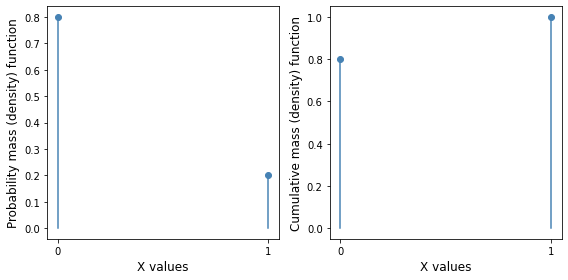

In [67]:
import scipy
pdfAndCDF(scipy.stats.binom(1,0.2).pmf, scipy.stats.binom(1,0.2).cdf,xmin=0,xmax=1,discrete=True)

### Geometric

#### Definition
A random variable has a geometric distribution if it is defined on all non-negative integers and the probability distribution of these values is 

\begin{align}
    p(X = t) = (1-p)^{t-1} p
\end{align}

This type of random variable describes a sequence of trials (experiments, outcomes, etc) where the first $t-1$ trials "failed" and the final trial was a "success". 
For example, the number of shots until you make a free-throw on shot $t$ or the number of negative COVID-19 tests until the $t^{\text{th}}$ test is positive could both have a geometric distribution. 

The values of a random variable are the number of attempts until a success. 

#### Expected value and variance
If a r.v. X has a geometric distribution with parameter $p$, 

\begin{align}
    X \sim \text{Geom}(p)
\end{align}

The expected value is 

\begin{align}
    E(X) = \frac{1}{p}
\end{align}
    
and the variance is

\begin{align}
    \text{Var}(X) =  \frac{1}{p} \frac{(1-p)}{p}
\end{align}

Below is a plot of a Geometric(0.3) random variable for the values from 1 to 15.

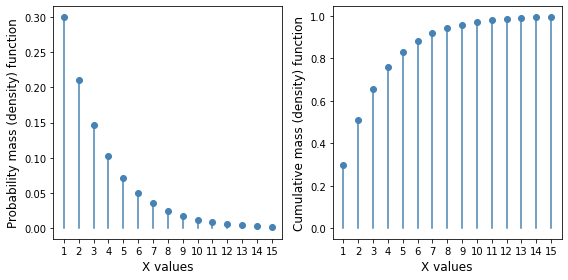

In [68]:
import scipy
pdfAndCDF(scipy.stats.geom(p=0.3).pmf,scipy.stats.geom(p=0.3).cdf,1,15)

### Uniform (Discrete)

#### Definition
A random variable has a uniform discrete distribution---$X \sim U(a,b)$---if it is defined for all values between two parameters $a$ and $b$, and the probability of values at or between $a$ and $b$ is

\begin{align}
    p(x) = \frac{1}{N}
\end{align}

where $N$ is the number of values the random variable can be.
The uniform discrete distribution assigns an equal probability to all possible values of a random variable.
#### Expected value and variance

The expectation of a r.v. following a uniform discrete distribution is the average of the two endpoints 
\begin{align}
    E(X) = \frac{a+b}{2}
\end{align}

The variance is 

\begin{align}
    Var(X) = \frac{(b-a+1)^2 - 1 }{12}
\end{align}

Below is a plot of the pmf and cmf for a Uniform Discrete(-5,5) random variable.

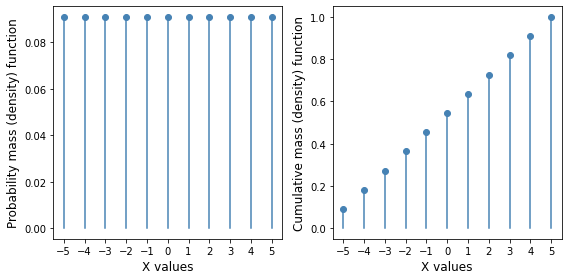

In [69]:
import scipy
pdfAndCDF(scipy.stats.randint(-5,5+1).pmf,scipy.stats.randint(-5,5+1).cdf,-5,5,discrete=True)

### Binomial 

#### Definition
The binomial distribution is a discrete distribution assigning probabilities to a number of successes (usually assigned a value of $1$) out of a total number of $N$.
We assume each of the $N$ trials are independent from one another, that only a success or failure can occur, and that a success occurs with a probability $\theta$. 
The binomial distribution is used anytime you ask "what is the probability of $x$ occurrences of the same event out of a total $N$ number of tries?"

The probability mass function (discrete so we can assign probabilities to individual outcomes) is 

\begin{align}
    p(x) = \binom{N}{x} \theta^{x} (1-\theta)^{N-x}
\end{align}

The symbol $\binom{N}{x}$ is called the a binomial coefficient, sometimes said "N choose x". 
The binomial coefficient (we'll see below) is the number of times you can select $x$ items from a total of $N$ items without caring about the order you selected them. 

#### Expected value and variance
The expectation is 

\begin{align}
    E(x) = N\theta
\end{align}

and variance is 

\begin{align}
    Var(x) = N\theta(1-\theta)
\end{align}

Below is a plot of the pmf and cmf of a Binomial(12,0.4) distributed random variable.

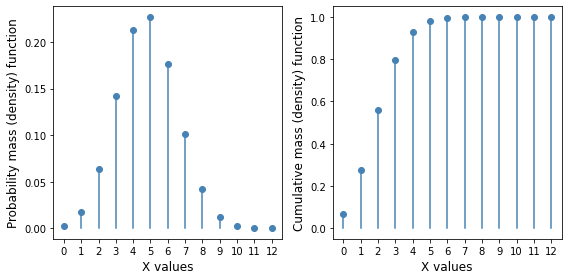

In [70]:
import scipy
pdfAndCDF(scipy.stats.binom(12,0.4).pmf,scipy.stats.binom(12,0.2).cdf,0,12,discrete=True)

### Poisson

#### Definition
A random variable $X$ has a Poisson distribution---$X\sim \text{Pois}\left( \lambda \right)$--- if it is discrete and it's probability mass function is 

\begin{align}
    p(X = k) = e^{-\lambda} \frac{ \lambda^{k} }{ k! }
\end{align}

A Poisson distributed random variable assigns probabilities to the number of events that occur over a specific time period. The parameter $\lambda$ is typically thought of as the rate of events per unit of time. For example, the number of deaths per month, number of phone calls per week, or number of emails per hour (so many). 

### Expected value and variance

The expected value is 

\begin{align}
    \text{E}(X) = \lambda
\end{align}

and the variance is 

\begin{align}
    \text{Var}(X) = \lambda
\end{align}

Below is the pmf and cdf for a random variable with a Poisson(4.2) distribution for the values from 0 to 15.

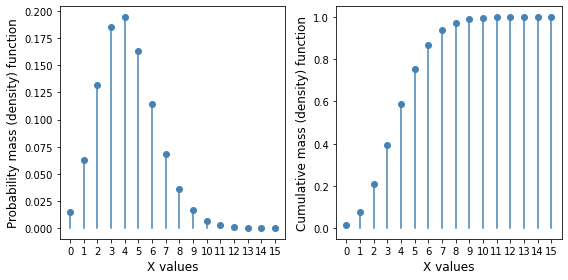

In [71]:
import scipy
pdfAndCDF(scipy.stats.poisson(4.2).pmf,scipy.stats.poisson(4.2).cdf,0,15,discrete=True)

## Continuous Distributions

Continuous probability distributions, unlike discrete distributions, do not assign probabilities to every possible outcome. 
This is because the probability of any single value a continuous r.v. could take is zero.

We associate probabilities with a **probability density function** (pdf), defining probability on a continuous *interval* as the areas under the pdf. 
When our r.v. was discrete, the sum of the probabilities of all possible events had to equal one. 
There is a similar rule for continuous r.v.s and densities.
The sum of the area under the curve of a pdf associated with a r.v. $X$ over the largest possible interval must equal $1$.  

Like the cumulative mass function for discrete r.v.s, continuous random variables have a **cumulative density function (CDF)**.
The CDF is a function that assigns a *probability* from the smallest possible value of a random variable up to a user-specified input (say $x$). 
Because the input to a *CDF* is an interval---(smallest possible value, x)---the output is a probability.


### Uniform (continuous)

A r.v. has a continuous uniform distribution $X \sim U(a,b)$ if the probability density is 

\begin{align}
    f(x) = \frac{1}{b-a}
\end{align}

The probability is defined for intervals between $a$ and $b$.
The CDF for a continuous uniform distribution is 

\begin{align}
    F(x) = \frac{x}{b-a}
\end{align}

#### Expectation and variance

The expected value (expectation) equals 

\begin{align}
    E(X) = \frac{a+b}{2}
\end{align}

and the variance equals 

\begin{align}
    Var(X) = \frac{(b-a)^2}{12}
\end{align}

Below is the pmf and cdf for a random variable with a Uniform(-1,1) distribution.

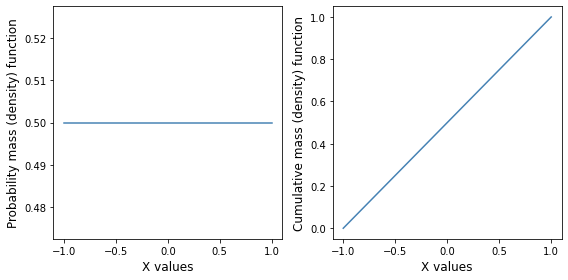

In [72]:
import scipy
pdfAndCDF(scipy.stats.uniform(-1,2).pdf,scipy.stats.uniform(-1,2).cdf,-1,1,discrete=False)

### Normal (Gaussian)
The Normal (or Gaussian) distribution describes the probability of a continuous random variable.
This is the (likely familiar) bell curve. 


The Normal distribution has two parameters: the mean ($\mu$) and the standard deviation ($\sigma$). 
The pdf is symmetric and unimodel and defined over all values from negative infinity to positive infinity. 
Values close to the mean are much, much more likely that values further from the mean. 
Because of this, the Normal distribution describes phenomena or values of a r.v. that are more or less expected to be close to $\mu$---surprises are not very likely. 

\begin{align}
    f(x) &= \frac{1}{\sqrt{2\pi} \sigma} e^{ - \frac{(x-\mu)^{2}}{2\sigma}  }\\
         &= \frac{1}{\sqrt{2\pi \sigma^{2} } } \exp \left\{ - \frac{(x-\mu)^{2}}{2\sigma}  \right\} \\
         &= \left( 2\pi \sigma^{2} \right)^{-1/2} \exp \left\{ -\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^{2}  \right\}
\end{align}

#### Expectation and variance

If $X$ is a r.v. and normally distributed $X \sim \mathcal{N}\left( \mu, \sigma^{2}\right)$,
the expectation is 

\begin{align}
    E(x) = \mu
\end{align}

and variance is 

\begin{align}
    Var(x) = \sigma^{2}
\end{align}

Below is the pmf and cdf for a random variable with a Normal(0,2) distribution.

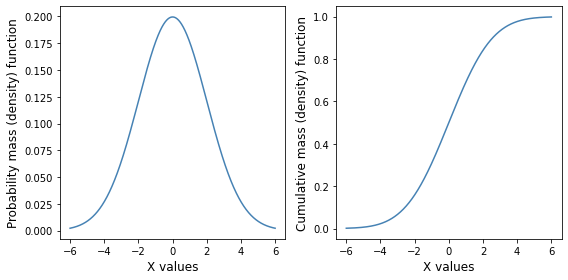

In [73]:
import scipy
pdfAndCDF(scipy.stats.norm(0,2).pdf,scipy.stats.norm(0,2).cdf,-6,6,discrete=False)

### Multivariate normal distribution

The multivariate normal distribution describes the probability over vectors of length $N$ such that each entry of the vector alone has a normal distribution.

#### Definition
A vector of length $n$ has a multivariate normal distribution (mvn)

\begin{align}
    x~\sim \text{MVN} \left( \mu , \Sigma \right)
\end{align}
where $\mu$ is a vector of length $n$ and $\Sigma$ is a matrix of dimension $(n,n)$
if the probability density associated with $x$ equals 

\begin{align}
    f(x) = \left(2\pi\right)^{-n/2} |\Sigma|^{-1/2} exp\left\{ \frac{1}{2}(x-\mu)'\Sigma^{-1}(x-\mu) \right\}
\end{align}

#### Expectation and variance
The expected value of $x$ and variance of $x$ are

\begin{align}
    E(x)   &= \mu\\
    Var(x) &= \Sigma
\end{align}

The matrix $\Sigma$ is called the covariance matrix. This matrix is square (same number of rows and columns) and symmetric (the element $\Sigma_{ij}$ = the element $\Sigma_{ji}$).
The covariance matrix has on it's diagonals the individual variances for each element x.
And the off diagonal elements, $\Sigma_{ij}$ contains the covariance between $x_{i}$ and $x_{j}$. 

## The expected value

### Expectation for discrete random variables

The **expectation** of a random variable is the sum of each value of the random variable weighted by the probability that value will occur. 

If $X$ is a random variable then the expectation of $X$ is 

\begin{align}
    \text{E}(X) & = x_{1} p(x_{1}) + x_{2} p(x_{2}) + \cdots + x_{n} p(x_{n}) \\
                & \sum_{i=1}^{N} x_{i} p(x_{i})
\end{align}

where the random variable $X$ can take any of $n$ values from $x_{1}$ to $x_{n}$.


### The Expectation of a function of a r.v.

We can generalize the expectation of a random $[E(X)]$ allowing us to compute the expectation of any function of a random variable. 
The expected value of a function of a r.v. $X$ is 

\begin{align}
    E[f(X)] = \sum_{i=1}^{N} f(x_{i})p(x_{i}) 
\end{align}

The expected value of $f(X)$ is just the value of each $f(x_{i})$ weighted by how often the value $x_{i}$ occurs. 
To see that this expectation is more general than our original definition, we can compute $E[f(X)]$ where $f$ is the identity function ($f(x) = x$).

\begin{align}
    E[f(X)] &= \sum_{i=1}^{N} f(x_{i})p(x_{i}) \\
            &= \sum_{i=1}^{N} x_{i}p(x_{i}) \\
            &= E(X)
\end{align}

## The Law of Large Numbers

The Law of Large Numbers says, informally, that a random variable's sample mean approaches its expected value as the number of observations used to compute the sample mean increases. The mathematical statement is more precise:

\begin{align}
    \text{For any } \epsilon >0 \text{ there exists a } N \text{ such that }
    p( |\bar{X}_{n} - E(X)| < \epsilon ) = 1
\end{align}
where $\bar{X}_{n}$ is the sample mean of $N$ independent random variables $X_{1},X_{2}, \cdots, X_{n}$ with the same expected value ($E(X)$).
